In [127]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [128]:
train_df = pd.read_csv('train_df.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus'], axis=1, inplace=True)
train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)
train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim
0,1617361,849246716,1,5,5.000000,0.000000,297,4.872054,0.363625,0.033451,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,297,4.872054,0.363625,0.012478,0.009009
2,15679577,849246716,1,8,3.375000,1.505941,297,4.872054,0.363625,0.007220,0.033333
3,16367779,849246716,1,9,4.444444,0.527046,297,4.872054,0.363625,0.095238,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,297,4.872054,0.363625,0.010870,0.000000


In [129]:
test_df = pd.read_csv('test_df.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus'], axis=1, inplace=True)
test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
              axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim
0,36330222,986428010,1,24,4.291667,1.267629,18,4.333333,1.188177,0.070423,0.012295
1,24360083,986428010,1,23,4.347826,1.191206,18,4.333333,1.188177,0.095361,0.049808
2,28891040,437083384,1,10,4.500000,0.707107,407,4.503686,0.887439,0.006944,0.005208
3,52449052,437083384,0,5,3.400000,1.516575,407,4.503686,0.887439,0.010390,0.059514
4,27192976,437083384,1,6,4.666667,0.816497,407,4.503686,0.887439,0.012942,0.003460


In [98]:
#len(test_df.query('positive == 1')) / len(test_df)
#train_df.drop('star_rating', axis=1, inplace=True)
#test_df.drop('star_rating', axis=1, inplace=True)

0.5690336590662324

In [88]:
from sklearn import preprocessing
def normalize(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    newdf = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns)

    return df

In [130]:
train_ids = train_df[['customer_id', 'product_parent']]

In [131]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
train_df_norm = pd.DataFrame(min_max_scaler.fit_transform(train_df), columns=train_df.columns)
train_df_norm[['customer_id', 'product_parent']] = train_ids
train_df_norm.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim
0,1617361,849246716,1.0,0.003717,1.000000,0.000000,0.047284,0.968013,0.128561,0.076459,0.000000
1,53052607,849246716,0.0,0.003717,0.650000,0.237171,0.047284,0.968013,0.128561,0.028520,0.009009
2,15679577,849246716,1.0,0.007435,0.593750,0.652091,0.047284,0.968013,0.128561,0.016503,0.033333
3,16367779,849246716,1.0,0.008674,0.861111,0.228218,0.047284,0.968013,0.128561,0.217687,0.000000
4,25485198,849246716,1.0,0.018587,1.000000,0.000000,0.047284,0.968013,0.128561,0.024845,0.000000


In [132]:
test_ids = test_df[['customer_id', 'product_parent']] 

In [133]:
test_df_norm = pd.DataFrame(min_max_scaler.transform(test_df), columns=test_df.columns)
test_df_norm[['customer_id', 'product_parent']]  = test_ids
test_df_norm.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,prod_review_count,prod_star_rating_mean,prod_star_rating_std,pos_sim,neg_sim
0,36330222,986428010,1.0,0.027261,0.822917,0.548900,0.002716,0.833333,0.420084,0.160966,0.012295
1,24360083,986428010,1.0,0.026022,0.836957,0.515807,0.002716,0.833333,0.420084,0.217968,0.049808
2,28891040,437083384,1.0,0.009913,0.875000,0.306186,0.064856,0.875921,0.313757,0.015873,0.005208
3,52449052,437083384,0.0,0.003717,0.600000,0.656696,0.064856,0.875921,0.313757,0.023748,0.059514
4,27192976,437083384,1.0,0.004957,0.916667,0.353553,0.064856,0.875921,0.313757,0.029582,0.003460


In [134]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']
train_x_norm = train_df_norm.drop('positive', axis=1)
test_x_norm = test_df.drop('positive', axis=1)

(array([ 9923.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13102.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

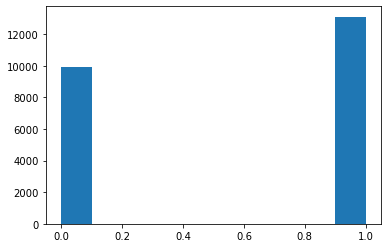

In [94]:
plt.hist(test_y)

In [122]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
rf.score(test_x, test_y)

0.6793919652551574

In [137]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(train_x_norm.drop(['customer_id', 'product_parent'], axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [138]:
knn.score(test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.762171552660152

In [139]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.drop(['customer_id', 'product_parent'], axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [140]:
gnb.score(test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.7466666666666667

In [111]:
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [112]:
nn_train_x = train_x_norm.drop(['customer_id', 'product_parent'], axis=1)
nn_test_x = test_x_norm.drop(['customer_id', 'product_parent'], axis=1)

In [113]:
np.shape(nn_train_x)

(68949, 8)

In [39]:
train_y_cat = to_categorical(train_y)
test_y_cat = to_categorical(test_y)

In [40]:
train_y_cat

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [118]:
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape=(8,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(1024, activation='relu', input_shape=(1024,)))
network.add(layers.Dense(512, activation='relu', input_shape=(1024,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(512, activation='relu', input_shape=(512,)))
network.add(layers.Dense(256, activation='relu', input_shape=(512,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(256, activation='relu', input_shape=(256,)))
network.add(layers.Dense(128, activation='relu', input_shape=(256,)))
#network.add(layers.Dropout(0.5))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))
network.add(layers.Dense(128, activation='relu', input_shape=(128,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(128,)))
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1024)              9216      
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_43 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_44 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_47 (Dense)             (None, 256)              

In [119]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 30
history = network.fit(nn_train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y))

Train on 68949 samples, validate on 23025 samples
Epoch 1/30
68949/68949 [==============================] - 4s 63us/step - loss: 0.6240 - accuracy: 0.6687 - val_loss: 114.9830 - val_accuracy: 0.5690
Epoch 2/30
68949/68949 [==============================] - 4s 56us/step - loss: 0.5863 - accuracy: 0.6897 - val_loss: 106.2683 - val_accuracy: 0.5690
Epoch 3/30
68949/68949 [==============================] - 4s 59us/step - loss: 0.5811 - accuracy: 0.6941 - val_loss: 139.8220 - val_accuracy: 0.5690
Epoch 4/30
68949/68949 [==============================] - 4s 55us/step - loss: 0.5790 - accuracy: 0.6932 - val_loss: 246.6450 - val_accuracy: 0.5690
Epoch 5/30
68949/68949 [==============================] - 4s 55us/step - loss: 0.5755 - accuracy: 0.6983 - val_loss: 143.1838 - val_accuracy: 0.5690
Epoch 6/30
68949/68949 [==============================] - 4s 55us/step - loss: 0.5761 - accuracy: 0.6986 - val_loss: 297.2828 - val_accuracy: 0.5690
Epoch 7/30
68949/68949 [==============================] 

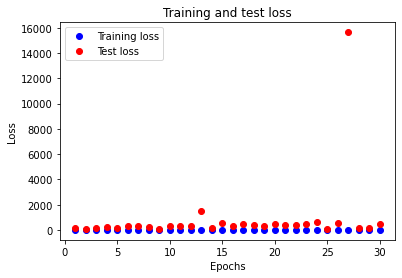

In [120]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

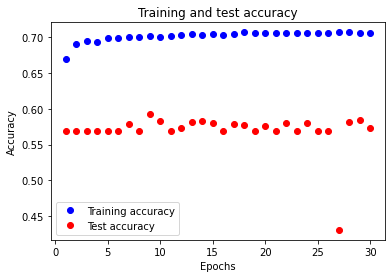

In [121]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
preds = network.predict(nn_test_x)

In [64]:
network.evaluate(nn_test_x, test_y_cat)

23025/23025 [==============================] - 1s 45us/step


[1.1920930376163597e-07, 0.0]

In [53]:
len(preds)

23025

In [55]:
correct = 0
pos_count = 0
star_cor = 0
for i, row in test_df.iterrows():
    if (np.argmax(preds[i]) > 3):
        pos_count += 1
    if (np.argmax(preds[i]) == np.argmax(test_y_cat[i])):
        star_cor += 1
    if (np.argmax(preds[i]) > 3 and np.argmax(test_y_cat[i]) > 3):
        correct += 1
    elif (np.argmax(preds[i]) <= 3 and np.argmax(test_y_cat[i]) <= 3):
        correct += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))

Correct: 17750 0.7709011943539631
Pos: 23007 0.9992182410423452
Star Correct: 13102 0.5690336590662324


In [142]:
(len(train_df.query('positive == 1 & (pos_sim >= neg_sim)')) + len(train_df.query('positive == 0 & (pos_sim < neg_sim)'))) / len(train_df)

0.7538180394204412

In [141]:
print('False Negatives:', len(train_df.query('positive == 1 & (pos_sim < neg_sim)')), len(train_df.query('positive == 1 & (pos_sim < neg_sim)')) / len(train_df))
print('False Positives:', len(train_df.query('positive == 0 & (pos_sim >= neg_sim)')), len(train_df.query('positive == 0 & (pos_sim >= neg_sim)')) / len(train_df))
print('Correct Negatives:', len(train_df.query('positive == 0 & (pos_sim < neg_sim)')), len(train_df.query('positive == 0 & (pos_sim < neg_sim)')) / len(train_df))
print('Correct Positives:', len(train_df.query('positive == 1 & (pos_sim >= neg_sim)')), len(train_df.query('positive == 1 & (pos_sim >= neg_sim)')) / len(train_df))

False Negatives: 7357 0.10670205514220656
False Positives: 9617 0.13947990543735225
Correct Negatives: 4110 0.059609276421702995
Correct Positives: 47865 0.6942087629987382


In [ ]:
len(train_df.query('positive == 1 & (pos_sim < neg_sim)'))